<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   topic     1669 non-null   object
 1   question  1669 non-null   object
dtypes: object(2)
memory usage: 26.2+ KB
None
               topic                                           question
0  Computer Networks  In the following pairs of OSI protocol layer/s...
1  Computer Networks  An IP machine Q has a path to another IP machi...
2  Computer Networks    To send same bit sequence, NRZ encoding require
3  Computer Networks  If there are n devices (nodes) in a network, w...
4  Computer Networks                In networking terminology UTP means


<ipython-input-2-af7fcce0d6c9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['topic'], order=df['topic'].value_counts().index, palette='viridis')


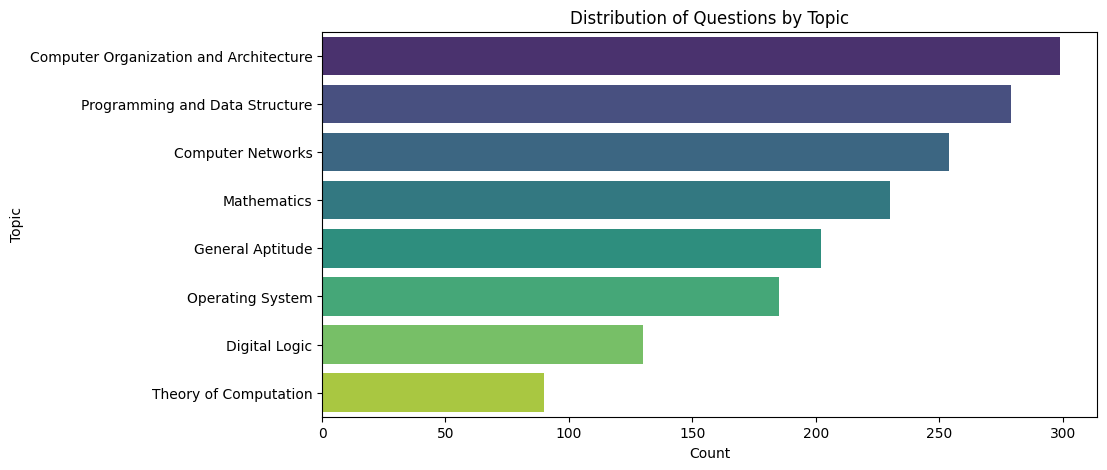

TF-IDF feature shape: (1335, 4017)
Accuracy: 0.8413173652694611
Classification Report:
                                         precision    recall  f1-score   support

                     Computer Networks       0.98      0.96      0.97        52
Computer Organization and Architecture       0.78      1.00      0.88        61
                         Digital Logic       1.00      0.59      0.74        22
                      General Aptitude       0.89      0.49      0.63        35
                           Mathematics       0.84      0.88      0.86        48
                      Operating System       0.94      0.76      0.84        45
        Programming and Data Structure       0.69      0.94      0.80        54
                 Theory of Computation       1.00      0.76      0.87        17

                              accuracy                           0.84       334
                             macro avg       0.89      0.80      0.82       334
                          weig

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('/content/questions-data.csv')

# Display basic info
print(df.info())
print(df.head())

# Plot topic distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df['topic'], order=df['topic'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Distribution of Questions by Topic')
plt.show()

# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(df['question'], df['topic'], test_size=0.2, random_state=42)

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF feature shape:", X_train_tfidf.shape)

# Train a Naïve Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
